In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
import pandas as pd
from sklearn import datasets
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
path1='/content/drive/MyDrive/train.csv'
path2='/content/drive/MyDrive/test.csv'
features = ['battery_power','bluetooth','clock_speed','dual_sim','front camera','4G','memory','depth','weight','n_cores',
            'camera','pixel height','pixel width','ram','height','width','3G','wifi']
target= ['price_range']            
#train = pd.read_csv(path1, header= None, encoding='utf-8')
train = pd.read_csv(path1,header=None,names=features + ['target'])
train=train.drop([0],axis=0)
display(train)

,battery_power,bluetooth,clock_speed,dual_sim,front camera,4G,memory,depth,weight,n_cores,camera,pixel height,pixel width,ram,height,width,3G,wifi,target
1,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,0,1,1
2,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,1,0,2
3,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,1,0,2
4,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,1,0,2
5,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,1,0,0
1997,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,1,1,2
1998,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,1,0,3
1999,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,1,1,0


In [3]:
X = train.iloc[0:,0:-1].values
X=X.astype('float64')
y = train.iloc[0:,-1].values
y=y.astype('int64')
print('Class labels:', np.unique(y))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify=y,random_state=0)
# standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

Class labels: [0 1 2 3]


In [4]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(0,4):
 mean_vecs.append(np.mean(X_train_std[y_train==label], axis=0))
 print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 0: [-0.2672 -0.0222  0.0215 -0.0189 -0.0717  0.0022 -0.06   -0.0621 -0.0083
  0.055  -0.0647 -0.243  -0.2207 -1.2372  0.0032 -0.0181 -0.0273 -0.0133]

MV 1: [-0.2672 -0.0222  0.0215 -0.0189 -0.0717  0.0022 -0.06   -0.0621 -0.0083
  0.055  -0.0647 -0.243  -0.2207 -1.2372  0.0032 -0.0181 -0.0273 -0.0133]

MV 2: [-0.0382 -0.0178 -0.0273  0.0033  0.0217 -0.0067  0.0125  0.0698  0.0108
 -0.0946  0.0038  0.0375 -0.0247 -0.4021 -0.0153 -0.0458 -0.0169 -0.0222]

MV 3: [-0.0144 -0.0133  0.0122 -0.01    0.0361 -0.0511 -0.0555 -0.0374  0.1085
  0.0599  0.0152 -0.0304 -0.0321  0.418  -0.0848 -0.0217  0.0247 -0.0089]



In [5]:
d = 18 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(0, 4), mean_vecs):
 class_scatter = np.zeros((d, d))
for row in X_train_std[y_train == label]:
 row, mv = row.reshape(d, 1), mv.reshape(d, 1)
 class_scatter += (row - mv).dot((row - mv).T)
 S_W += class_scatter
print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))


Within-class scatter matrix: 18x18


In [6]:
print('Class label distribution: %s'% np.bincount(y_train)[1:])

Class label distribution: [450 450 450]


In [7]:
d = 18 # number of features
S_W = np.zeros((d, d))
for label,mv in zip(range(0, 4), mean_vecs):
 class_scatter = np.cov(X_train_std[y_train==label].T)
 S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s'% (S_W.shape[0], S_W.shape[1]))

Scaled within-class scatter matrix: 18x18


In [8]:
mean_overall = np.mean(X_train_std, axis=0)
d = 18 # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
 n = X_train_std[y_train == i + 1, :].shape[0]
 mean_vec = mean_vec.reshape(d, 1) # make column vector
 mean_overall = mean_overall.reshape(d, 1)
 S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)
print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 18x18


In [9]:
eigen_vals, eigen_vecs =np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

In [10]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i])for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0], reverse=True)
print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
 print(eigen_val[0])

Eigenvalues in descending order:

2761.1683058805916
7.691652254936819
2.38451382088797
6.607850257610545e-14
6.607850257610545e-14
7.287099053698366e-15
2.0213530513079466e-15
1.6691624449635152e-15
1.6691624449635152e-15
7.590427200393688e-16
4.035552833920021e-16
4.035552833920021e-16
3.6921964156597314e-16
3.6921964156597314e-16
2.8411412398623085e-16
1.882745598967614e-16
1.882745598967614e-16
3.2915788537468454e-17


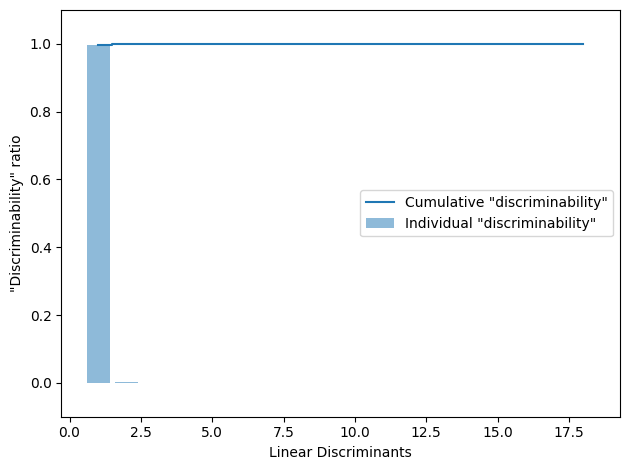

In [11]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1, 19), discr, alpha=0.5, align='center',label='Individual "discriminability"')
plt.step(range(1, 19), cum_discr, where='mid',label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear Discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [12]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[ 2.1176e-01  3.6057e-01]
 [ 4.9918e-04  5.4896e-02]
 [-1.1798e-02 -1.0170e-01]
 [-1.2017e-02  8.7782e-02]
 [ 6.8589e-03 -3.8879e-03]
 [-4.7293e-03  2.3654e-01]
 [ 1.3135e-02  2.5164e-01]
 [ 8.8133e-05  3.1253e-01]
 [-2.2269e-02 -3.1048e-01]
 [ 1.6806e-03 -4.2685e-01]
 [ 6.8243e-04  5.8223e-02]
 [ 1.1581e-01  4.0321e-01]
 [ 1.1261e-01  1.9848e-01]
 [ 9.6317e-01 -1.5467e-01]
 [-1.3955e-03  2.6596e-01]
 [ 2.1295e-03 -1.2267e-01]
 [ 1.4059e-02 -1.9567e-01]
 [-1.1637e-02 -4.0425e-03]]


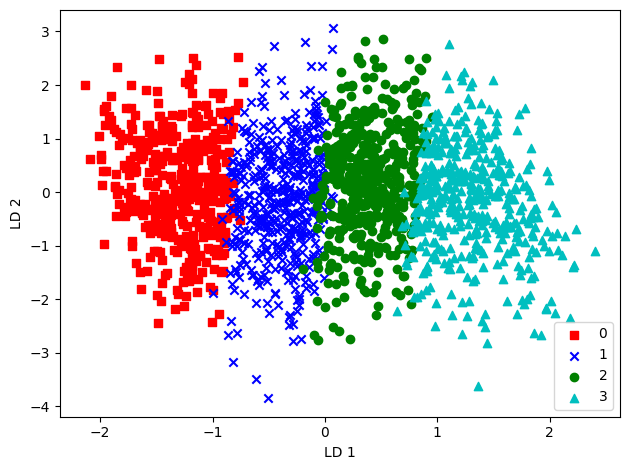

In [13]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g','c']
markers = ['s', 'x', 'o','^']
for l, c, m in zip(np.unique(y_train), colors, markers):
 plt.scatter(X_train_lda[y_train==l, 0],
 X_train_lda[y_train==l, 1] * (-1),
 c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [14]:
# the following import statement is one line
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [15]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
 #setup marker generator and color map
 markers = ('s', 'x', 'o', '^', 'v')
 colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])
 # plot the decision surface
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
 np.arange(x2_min, x2_max, resolution))
 Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 Z = Z.reshape(xx1.shape)
 plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())
 # plot examples by class
 for idx, cl in enumerate(np.unique(y)):
   plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)

<ipython-input-15-9013800c0c45>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)


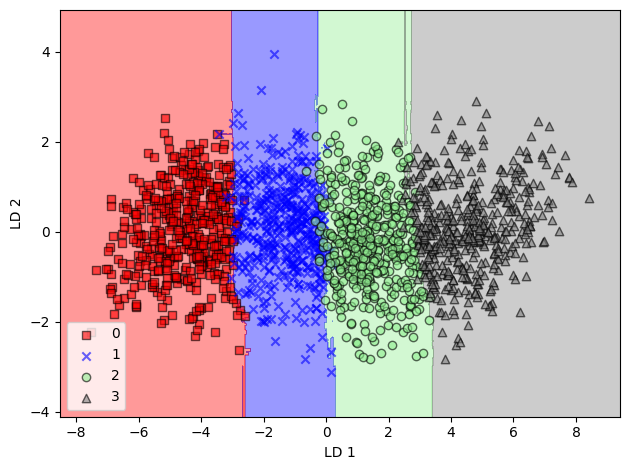

In [16]:
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier(n_estimators=100, random_state=0)
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

<ipython-input-15-9013800c0c45>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.6,color=cmap(idx),edgecolor='black',marker=markers[idx],label=cl)


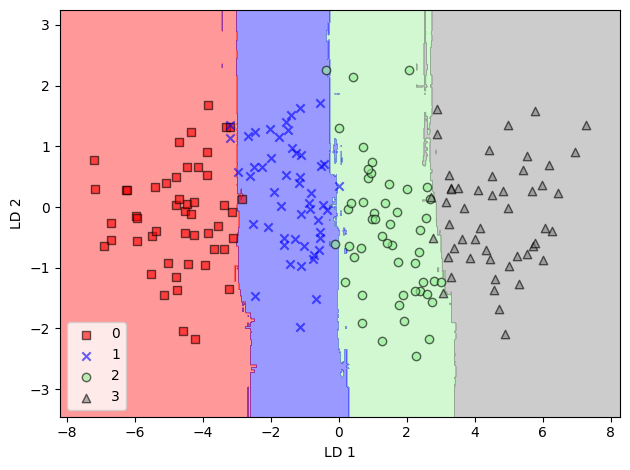

In [17]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()